MORDM OPTIMIZATION

In [1]:
from problem_formulation import get_model_for_problem_formulation
from ema_workbench import ema_logging, MultiprocessingEvaluator, Scenario, HypervolumeMetric
from ema_workbench.em_framework.optimization import (ArchiveLogger, EpsilonProgress, to_problem)

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [2]:
model, planning_steps = get_model_for_problem_formulation(2)


#The model requires a reference scenario to "kick-start"
reference_scenario = Scenario('reference', **{
    'discount rate-0': 1.5,
    'discount rate-1': 1.5,
    'discount rate-2': 1.5,
    'A.0_ID flood wave shape': 75,
    'A.1_Bmax': 240,
    'A.1_pfail': 0.25,
    'A.1_Brate': 10,
    'A.2_Bmax': 240,
    'A.2_pfail': 0.25,
    'A.2_Brate': 10,
    'A.3_Bmax': 240,
    'A.3_pfail': 0.25,
    'A.3_Brate': 10,
    'A.4_Bmax': 240,
    'A.4_pfail': 0.25,
    'A.4_Brate': 10,
    'A.5_Bmax': 240,
    'A.5_pfail': 0.25,
    'A.5_Brate': 10
})

In [3]:
convergence_metrics = [EpsilonProgress()]
nfe = 1000
epsilon = [0.5,0.5,0.5,0.01,0.01]
# Each epsilon value corresponds to a model outcome. The model outcomes are:
# expected damages, dike investment costs, rfr costs, evacuation cost, and casualties
# We select higher epsilon values to damages and costs, while we choose lower values for evacuation costs and casualties.

In [4]:
with MultiprocessingEvaluator(model) as evaluator:
    optimization_result = evaluator.optimize(nfe=nfe, searchover='levers', epsilons=epsilon,  convergence=convergence_metrics,reference=reference_scenario)

Before


[MainProcess/INFO] pool started with 10 workers
1099it [00:19, 55.07it/s]                                                      
[MainProcess/INFO] optimization completed, found 61 solutions
[MainProcess/INFO] terminating pool


After


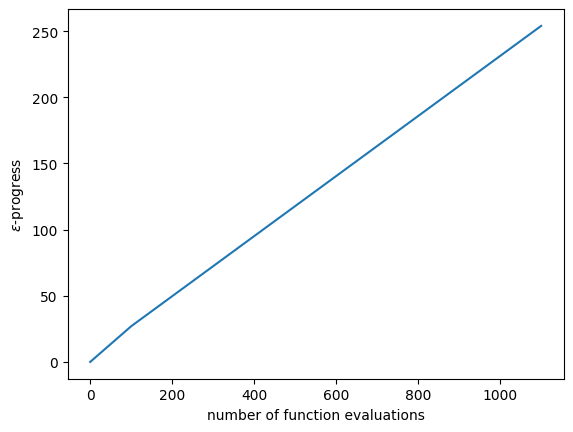

In [5]:
import matplotlib.pyplot as plt
import numpy as np
result, convergence = optimization_result
fig, ax = plt.subplots()
ax.plot(convergence.nfe, convergence.epsilon_progress)
ax.set_ylabel('$\epsilon$-progress')

ax.set_xlabel('number of function evaluations')
plt.show()

In [6]:
from ema_workbench import save_results
#save_results(total, 'MORDM_100k_ep0.25.tar.gz'.format(nfe))

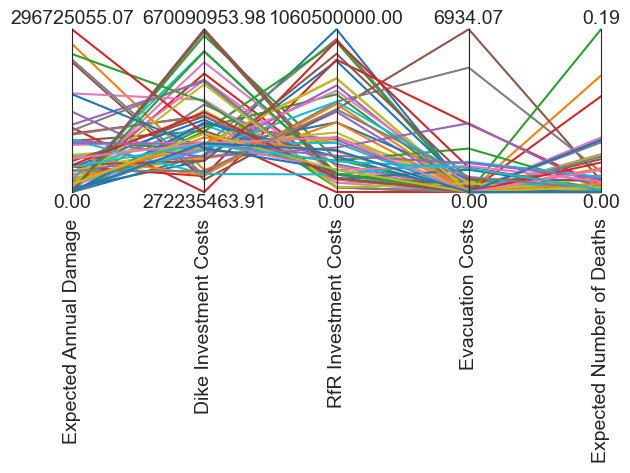

In [7]:
from ema_workbench.analysis import parcoords

data = result.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [8]:
# Select only those policies that result in an acceptable # of deaths
archive_allowable_deaths = result[result['Expected Number of Deaths'] < 0.001]
archive_allowable_deaths

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths
0,1,0,1,1,1,0,1,1,1,1,...,4,2,2,0,0,0.000000e+00,3.626490e+08,1.060500e+09,0.000000,0.000000
2,0,0,0,0,0,0,1,1,1,0,...,6,2,5,5,5,0.000000e+00,6.544312e+08,2.133000e+08,0.000000,0.000000
3,1,0,0,0,0,0,0,0,1,0,...,0,8,5,6,6,1.037321e+07,5.618301e+08,1.153000e+08,240.116810,0.000821
7,0,0,1,1,0,0,1,0,1,0,...,1,4,5,4,0,0.000000e+00,3.873492e+08,9.972000e+08,0.000000,0.000000
10,0,0,1,1,0,0,1,0,0,0,...,4,3,3,3,0,1.863299e+07,3.797283e+08,4.543000e+08,543.674947,0.000982
11,0,1,1,0,0,0,1,0,0,0,...,5,7,5,5,0,0.000000e+00,4.405907e+08,3.211000e+08,0.000000,0.000000
12,0,1,1,0,0,1,1,1,1,1,...,0,2,4,4,1,0.000000e+00,4.206225e+08,9.776000e+08,0.000000,0.000000
14,0,0,1,0,0,0,0,0,0,0,...,1,4,6,3,9,0.000000e+00,4.384580e+08,3.407000e+08,0.000000,0.000000
15,0,0,1,0,0,0,1,0,0,0,...,4,7,7,1,5,0.000000e+00,6.700910e+08,1.153000e+08,0.000000,0.000000
17,0,0,0,0,0,0,1,1,0,0,...,1,1,4,4,7,5.033458e+06,4.860904e+08,1.826000e+08,104.004831,0.000343


In [9]:
# Remove columns for outcomes from the dataframe, resulting in a df of polcies
policies = archive_allowable_deaths.drop([o.name for o in model.outcomes], axis=1)
policies

,0_RfR 0,0_RfR 1,0_RfR 2,1_RfR 0,1_RfR 1,1_RfR 2,2_RfR 0,2_RfR 1,2_RfR 2,3_RfR 0,...,A.2_DikeIncrease 2,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.3_DikeIncrease 2,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2
0,1,0,1,1,1,0,1,1,1,1,...,1,2,7,1,5,4,2,2,0,0
2,0,0,0,0,0,0,1,1,1,0,...,1,2,4,3,8,6,2,5,5,5
3,1,0,0,0,0,0,0,0,1,0,...,4,4,8,1,6,0,8,5,6,6
7,0,0,1,1,0,0,1,0,1,0,...,0,3,4,1,9,1,4,5,4,0
10,0,0,1,1,0,0,1,0,0,0,...,0,5,2,1,5,4,3,3,3,0
11,0,1,1,0,0,0,1,0,0,0,...,0,7,0,5,7,5,7,5,5,0
12,0,1,1,0,0,1,1,1,1,1,...,3,7,0,2,7,0,2,4,4,1
14,0,0,1,0,0,0,0,0,0,0,...,0,7,2,1,6,1,4,6,3,9
15,0,0,1,0,0,0,1,0,0,0,...,6,6,5,5,6,4,7,7,1,5
17,0,0,0,0,0,0,1,1,0,0,...,3,5,3,5,5,1,1,4,4,7


In [10]:
convergence_metrics = [
    ArchiveLogger(
        "./MORDM_Data",
        [l.name for l in model.levers],
        [o.name for o in model.outcomes],
        base_filename="MORDM_HV_1.tar.gz",
    ),
    EpsilonProgress(),
]

with MultiprocessingEvaluator(model) as evaluator:
    results, convergence = evaluator.optimize(nfe=nfe, searchover='levers', epsilons=epsilon,  convergence=convergence_metrics,reference=reference_scenario)

[MainProcess/INFO] pool started with 10 workers
1094it [00:20, 53.11it/s]                                                      
[MainProcess/INFO] optimization completed, found 76 solutions
[MainProcess/INFO] terminating pool


In [11]:
archives = ArchiveLogger.load_archives("./MORDM_Data/MORDM_HV_1.tar.gz")

In [12]:
results_sanitized = results
model_sanitized = model

# Here, we need to rename...
def sanitize_as_python_identifier(x):
    # Replace dots
    x = x.replace(".","Ç")
    # Replace spaces
    x = x.replace(" ","Ñ")
    # Add letter if starts with digit
    if x.startswith(("0","1","2","3","4","5")):
        x = "A" + x
    return x

results_sanitized.columns = [sanitize_as_python_identifier(x) for x in results.columns]

for lev in model_sanitized.levers:
    lev.name = sanitize_as_python_identifier(lev.name)

for unc in model_sanitized.uncertainties:
    unc.name = sanitize_as_python_identifier(unc.name)

for out in model_sanitized.outcomes:
    out.name = sanitize_as_python_identifier(out.name)

Next identifier: 0_RfR 0
Next identifier: 0_RfR 1
Next identifier: 0_RfR 2
Next identifier: 1_RfR 0
Next identifier: 1_RfR 1
Next identifier: 1_RfR 2
Next identifier: 2_RfR 0
Next identifier: 2_RfR 1
Next identifier: 2_RfR 2
Next identifier: 3_RfR 0
Next identifier: 3_RfR 1
Next identifier: 3_RfR 2
Next identifier: 4_RfR 0
Next identifier: 4_RfR 1
Next identifier: 4_RfR 2
Next identifier: EWS_DaysToThreat
Next identifier: A.1_DikeIncrease 0
Next identifier: A.1_DikeIncrease 1
Next identifier: A.1_DikeIncrease 2
Next identifier: A.2_DikeIncrease 0
Next identifier: A.2_DikeIncrease 1
Next identifier: A.2_DikeIncrease 2
Next identifier: A.3_DikeIncrease 0
Next identifier: A.3_DikeIncrease 1
Next identifier: A.3_DikeIncrease 2
Next identifier: A.4_DikeIncrease 0
Next identifier: A.4_DikeIncrease 1
Next identifier: A.4_DikeIncrease 2
Next identifier: A.5_DikeIncrease 0
Next identifier: A.5_DikeIncrease 1
Next identifier: A.5_DikeIncrease 2
Next identifier: Expected Annual Damage
Next identi

In [13]:
problem = to_problem(model_sanitized, searchover="levers")

the_param_names = problem.parameter_names
the_itertuples = results_sanitized.itertuples()

for row in the_itertuples:
    print(row)
    the_decision_variables = [getattr(row, attr) for attr in problem.parameter_names]
    print(the_decision_variables)


Pandas(Index=0, A0_RfRÑ0=0, A0_RfRÑ1=1, A0_RfRÑ2=1, A1_RfRÑ0=0, A1_RfRÑ1=1, A1_RfRÑ2=0, A2_RfRÑ0=1, A2_RfRÑ1=0, A2_RfRÑ2=1, A3_RfRÑ0=1, A3_RfRÑ1=0, A3_RfRÑ2=1, A4_RfRÑ0=0, A4_RfRÑ1=0, A4_RfRÑ2=0, EWS_DaysToThreat=0, AÇ1_DikeIncreaseÑ0=0, AÇ1_DikeIncreaseÑ1=0, AÇ1_DikeIncreaseÑ2=9, AÇ2_DikeIncreaseÑ0=3, AÇ2_DikeIncreaseÑ1=0, AÇ2_DikeIncreaseÑ2=4, AÇ3_DikeIncreaseÑ0=6, AÇ3_DikeIncreaseÑ1=3, AÇ3_DikeIncreaseÑ2=0, AÇ4_DikeIncreaseÑ0=2, AÇ4_DikeIncreaseÑ1=3, AÇ4_DikeIncreaseÑ2=7, AÇ5_DikeIncreaseÑ0=1, AÇ5_DikeIncreaseÑ1=3, AÇ5_DikeIncreaseÑ2=5, ExpectedÑAnnualÑDamage=24578820.149917763, DikeÑInvestmentÑCosts=384748479.4210631, RfRÑInvestmentÑCosts=690800000.0, EvacuationÑCosts=0.0, ExpectedÑNumberÑofÑDeaths=0.010112075440006455)
[0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 9, 3, 0, 4, 6, 3, 0, 2, 3, 7, 1, 3, 5]
Pandas(Index=1, A0_RfRÑ0=0, A0_RfRÑ1=1, A0_RfRÑ2=1, A1_RfRÑ0=0, A1_RfRÑ1=0, A1_RfRÑ2=0, A2_RfRÑ0=1, A2_RfRÑ1=1, A2_RfRÑ2=0, A3_RfRÑ0=0, A3_RfRÑ1=0, A3_RfRÑ2=0, A4_RfRÑ0=0, 

In [16]:
reference_set = results_sanitized
problem = to_problem(model_sanitized, searchover="levers")

hv = HypervolumeMetric(reference_set, problem)

hypervolume = []
for nfe, archive in archives.items():
    archive_sanitized = archive
    archive_sanitized.columns = [sanitize_as_python_identifier(x) for x in archive_sanitized.columns]
    result = (nfe, hv.calculate(archive))
    hypervolume.append(result)

hypervolume.sort(key=lambda x:x[0])
hypervolume = np.asarray(hypervolume)


Next identifier: Unnamed: 0
Next identifier: 0_RfR 0
Next identifier: 0_RfR 1
Next identifier: 0_RfR 2
Next identifier: 1_RfR 0
Next identifier: 1_RfR 1
Next identifier: 1_RfR 2
Next identifier: 2_RfR 0
Next identifier: 2_RfR 1
Next identifier: 2_RfR 2
Next identifier: 3_RfR 0
Next identifier: 3_RfR 1
Next identifier: 3_RfR 2
Next identifier: 4_RfR 0
Next identifier: 4_RfR 1
Next identifier: 4_RfR 2
Next identifier: EWS_DaysToThreat
Next identifier: A.1_DikeIncrease 0
Next identifier: A.1_DikeIncrease 1
Next identifier: A.1_DikeIncrease 2
Next identifier: A.2_DikeIncrease 0
Next identifier: A.2_DikeIncrease 1
Next identifier: A.2_DikeIncrease 2
Next identifier: A.3_DikeIncrease 0
Next identifier: A.3_DikeIncrease 1
Next identifier: A.3_DikeIncrease 2
Next identifier: A.4_DikeIncrease 0
Next identifier: A.4_DikeIncrease 1
Next identifier: A.4_DikeIncrease 2
Next identifier: A.5_DikeIncrease 0
Next identifier: A.5_DikeIncrease 1
Next identifier: A.5_DikeIncrease 2
Next identifier: Expect

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(hypervolume[:, 0], hypervolume[:, 1])
ax2.set_ylim(ymin=0)
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [ ]:
from ema_workbench.analysis import parcoords

data = result.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

Filtering the found solutions to those that are most important for the Delta Commission.

In [ ]:
from ema_workbench.analysis import parcoords

data = logical.loc[:, [o.name for o in model.outcomes]]
limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()